### Johannes Best codes in the world 

In [107]:
# Importing modules 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [108]:
#import data
features = pd.read_csv("C:/Users/johan/OneDrive/Copenhagen/CBS/3rd Semester/Applied ML/Assignment/AppliedML_Assignment/Assignment2/Data/Features data set.csv")
sales = pd.read_csv("C:/Users/johan/OneDrive/Copenhagen/CBS/3rd Semester/Applied ML/Assignment/AppliedML_Assignment/Assignment2/Data/sales data-set.csv")
stores = pd.read_csv("C:/Users/johan/OneDrive/Copenhagen/CBS/3rd Semester/Applied ML/Assignment/AppliedML_Assignment/Assignment2/Data/stores data-set.csv")

In [109]:
# Convert the date column to datetime format 
features["Date"] = pd.to_datetime(features["Date"], format="%d/%m/%Y")
sales["Date"] = pd.to_datetime(sales["Date"], format="%d/%m/%Y")

In [110]:
# Forwoard fill impution for 'CPI' and 'Unemployment'
features['CPI'].fillna(method='ffill', inplace=True)
features['Unemployment'].fillna(method='ffill', inplace=True)

In [111]:
features['Week'] = features.Date.dt.week

C:\Users\johan\AppData\Local\Temp\ipykernel_3144\2978714185.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  features['Week'] = features.Date.dt.week


In [112]:
# Imputing Markdown columns
# Impute NaN values based on weekly average
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for col in markdown_columns:
    weekly_avg = features.groupby('Week')[col].transform('mean')
    features[col].fillna(weekly_avg, inplace=True)

# can't impute all values for MarkDown2 , dropping Markdown2.

features.drop('MarkDown2', axis = 1, inplace=True)
features.drop('Week', axis=1, inplace=True)
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,24089.612333,198.031818,24865.942619,4185.380333,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,29880.900556,197.092500,20305.431829,5089.147556,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,12536.748111,59.385610,7038.310625,5646.276000,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,8504.312444,25.995714,2879.735679,4458.685000,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,11293.039000,22.353662,6312.144304,2911.005778,211.350143,8.106,False


In [113]:
# Encoding 'IsHoliday' & 'Type'
label_encoder = LabelEncoder()
features['IsHoliday'] = label_encoder.fit_transform(features['IsHoliday'])
sales['IsHoliday'] = label_encoder.fit_transform(sales['IsHoliday'])
stores['Type'] = label_encoder.fit_transform(stores['Type'])

In [114]:
# Merging the data
tmp_df = pd.merge(sales, features, on=['Store', 'Date', 'IsHoliday'], how='left')
df = pd.merge(stores, tmp_df, on=['Store'], how='left')
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,0,151315,1,2010-02-05,24924.50,0,42.31,2.572,24089.612333,198.031818,24865.942619,4185.380333,211.096358,8.106
1,1,0,151315,1,2010-02-12,46039.49,1,38.51,2.548,29880.900556,197.092500,20305.431829,5089.147556,211.242170,8.106
2,1,0,151315,1,2010-02-19,41595.55,0,39.93,2.514,12536.748111,59.385610,7038.310625,5646.276000,211.289143,8.106
3,1,0,151315,1,2010-02-26,19403.54,0,46.63,2.561,8504.312444,25.995714,2879.735679,4458.685000,211.319643,8.106
4,1,0,151315,1,2010-03-05,21827.90,0,46.50,2.625,11293.039000,22.353662,6312.144304,2911.005778,211.350143,8.106


In [115]:
df["Date"][421550:]

#2012-08-03

421550   2012-06-15
421551   2012-06-22
421552   2012-06-29
421553   2012-07-06
421554   2012-07-13
421555   2012-07-20
421556   2012-07-27
421557   2012-08-03
421558   2012-08-10
421559   2012-08-17
421560   2012-08-24
421561   2012-08-31
421562   2012-09-07
421563   2012-09-14
421564   2012-09-21
421565   2012-09-28
421566   2012-10-05
421567   2012-10-12
421568   2012-10-19
421569   2012-10-26
Name: Date, dtype: datetime64[ns]

In [116]:
aggregated_df = df.groupby(['Store', 'Date']).agg({
    'Type': 'mean',
    'Size': 'mean',
    'Dept': 'mean',
    'Weekly_Sales': 'sum',  # Sum the weekly sales for each store and week
    'IsHoliday': 'mean',
    'Temperature': 'mean',
    'Fuel_Price': 'mean',
    'MarkDown1': 'mean',
    'MarkDown3': 'mean',
    'MarkDown4': 'mean',
    'MarkDown5': 'mean',
    'CPI': 'mean',
    'Unemployment': 'mean'
}).reset_index()

In [117]:
aggregated_df.head()

,Store,Date,Type,Size,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,0.0,151315.0,43.616438,1643690.90,0.0,42.31,2.572,24089.612333,198.031818,24865.942619,4185.380333,211.096358,8.106
1,1,2010-02-12,0.0,151315.0,43.569444,1641957.44,1.0,38.51,2.548,29880.900556,197.092500,20305.431829,5089.147556,211.242170,8.106
2,1,2010-02-19,0.0,151315.0,43.616438,1611968.17,0.0,39.93,2.514,12536.748111,59.385610,7038.310625,5646.276000,211.289143,8.106
3,1,2010-02-26,0.0,151315.0,43.569444,1409727.59,0.0,46.63,2.561,8504.312444,25.995714,2879.735679,4458.685000,211.319643,8.106
4,1,2010-03-05,0.0,151315.0,44.041096,1554806.68,0.0,46.50,2.625,11293.039000,22.353662,6312.144304,2911.005778,211.350143,8.106


In [118]:
aggregated_df.drop("Dept", axis=1, inplace= True)

In [119]:
aggregated_df["Relative Sales"] = aggregated_df["Weekly_Sales"] / aggregated_df["Size"]

In [120]:
aggregated_df.head()

,Store,Date,Type,Size,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Relative Sales
0,1,2010-02-05,0.0,151315.0,1643690.90,0.0,42.31,2.572,24089.612333,198.031818,24865.942619,4185.380333,211.096358,8.106,10.862710
1,1,2010-02-12,0.0,151315.0,1641957.44,1.0,38.51,2.548,29880.900556,197.092500,20305.431829,5089.147556,211.242170,8.106,10.851254
2,1,2010-02-19,0.0,151315.0,1611968.17,0.0,39.93,2.514,12536.748111,59.385610,7038.310625,5646.276000,211.289143,8.106,10.653063
3,1,2010-02-26,0.0,151315.0,1409727.59,0.0,46.63,2.561,8504.312444,25.995714,2879.735679,4458.685000,211.319643,8.106,9.316509
4,1,2010-03-05,0.0,151315.0,1554806.68,0.0,46.50,2.625,11293.039000,22.353662,6312.144304,2911.005778,211.350143,8.106,10.275298


In [121]:
#find top 5 stores of last 3 months 
filtered_df = aggregated_df[(aggregated_df["Date"]>= "2012-08-03") &(aggregated_df["Date"]<="2012-10-26")]

#group by store and sum up relative sales
store_sales_sum = filtered_df.groupby('Store')['Relative Sales'].sum().reset_index()

# Sort the stores by the sum of "Relative Sales" in descending order and get the top 5 stores
top_5_stores = store_sales_sum.nlargest(5, 'Relative Sales')

In [122]:
filtered_df

,Store,Date,Type,Size,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Relative Sales
130,1,2012-08-03,0.0,151315.0,1631135.79,0.0,86.11,3.417,27584.78,30.23,12007.04,4661.71,221.949864,6.908,10.779736
131,1,2012-08-10,0.0,151315.0,1592409.97,0.0,85.05,3.494,11436.22,6.85,6964.26,4836.22,221.958433,6.908,10.523808
132,1,2012-08-17,0.0,151315.0,1597868.05,0.0,84.85,3.571,3662.06,4.84,2752.20,3446.15,222.038411,6.908,10.559879
133,1,2012-08-24,0.0,151315.0,1494122.38,0.0,77.66,3.620,6237.83,2.97,3463.03,7988.25,222.171946,6.908,9.874252
134,1,2012-08-31,0.0,151315.0,1582083.40,0.0,80.49,3.638,21442.73,21.70,13209.64,3032.96,222.305480,6.908,10.455562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,1.0,118221.0,713173.95,0.0,64.88,3.997,4556.61,1.50,1601.01,3288.25,192.013558,8.684,6.032549
6431,45,2012-10-05,1.0,118221.0,733455.07,0.0,64.89,3.985,5046.74,18.82,2253.43,2340.01,192.170412,8.667,6.204101
6432,45,2012-10-12,1.0,118221.0,734464.36,0.0,54.47,4.000,1956.28,7.89,599.32,3990.54,192.327265,8.667,6.212639
6433,45,2012-10-19,1.0,118221.0,718125.53,0.0,56.47,3.969,2004.02,3.18,437.73,1537.49,192.330854,8.667,6.074433


In [123]:
top_5_stores
#the 43, 42,10,37,23

,Store,Relative Sales
42,43,195.602390
41,42,183.043413
9,10,179.668021
36,37,171.359844
22,23,162.355635


In [124]:
store_sales_sum.sort_values(by="Relative Sales", ascending=False, inplace=True)

store_sales_sum

,Store,Relative Sales
42,43,195.602390
41,42,183.043413
9,10,179.668021
36,37,171.359844
22,23,162.355635
2,3,142.606465
37,38,141.380340
3,4,135.223843
0,1,133.929805
16,17,132.775059


In [125]:
top5 = [43, 42, 10, 37, 23]
top5_df = filtered_df[filtered_df["Store"].isin(top5)]
top5_df

,Store,Date,Type,Size,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Relative Sales
1417,10,2012-08-03,1.0,126512.0,1939440.09,0.0,84.76,3.595,37194.44,53.400000,21623.930000,2549.27,130.737871,7.170,15.330088
1418,10,2012-08-10,1.0,126512.0,1880436.94,0.0,90.78,3.811,15282.47,58.800000,5537.010000,14827.71,130.756161,7.170,14.863704
1419,10,2012-08-17,1.0,126512.0,1827797.40,0.0,88.83,4.002,4407.90,7.200000,3037.560000,3717.52,130.790968,7.170,14.447621
1420,10,2012-08-24,1.0,126512.0,1764984.15,0.0,82.50,4.055,11322.69,34.000000,6602.590000,7256.22,130.838161,7.170,13.951120
1421,10,2012-08-31,1.0,126512.0,1650285.54,0.0,86.97,3.886,26218.85,68.240000,12440.510000,3544.68,130.885355,7.170,13.044498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6144,43,2012-09-28,2.0,41062.0,577792.32,0.0,77.55,3.666,343.99,6.735758,1899.329737,1087.72,214.305250,9.285,14.071217
6145,43,2012-10-05,2.0,41062.0,642614.89,0.0,74.09,3.617,183.84,0.010000,3124.299474,3093.39,214.491267,8.839,15.649868
6146,43,2012-10-12,2.0,41062.0,619369.72,0.0,71.14,3.601,90.11,14.560000,639.365405,911.55,214.677283,8.839,15.083769
6147,43,2012-10-19,2.0,41062.0,623919.23,0.0,71.25,3.594,121.84,11.140000,507.965000,964.01,214.721249,8.839,15.194565


In [126]:
top5_df = top5_df.sort_values(by = ["Store", "Date"], ascending=[True, True])
top5_df

,Store,Date,Type,Size,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Relative Sales
1417,10,2012-08-03,1.0,126512.0,1939440.09,0.0,84.76,3.595,37194.44,53.400000,21623.930000,2549.27,130.737871,7.170,15.330088
1418,10,2012-08-10,1.0,126512.0,1880436.94,0.0,90.78,3.811,15282.47,58.800000,5537.010000,14827.71,130.756161,7.170,14.863704
1419,10,2012-08-17,1.0,126512.0,1827797.40,0.0,88.83,4.002,4407.90,7.200000,3037.560000,3717.52,130.790968,7.170,14.447621
1420,10,2012-08-24,1.0,126512.0,1764984.15,0.0,82.50,4.055,11322.69,34.000000,6602.590000,7256.22,130.838161,7.170,13.951120
1421,10,2012-08-31,1.0,126512.0,1650285.54,0.0,86.97,3.886,26218.85,68.240000,12440.510000,3544.68,130.885355,7.170,13.044498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6144,43,2012-09-28,2.0,41062.0,577792.32,0.0,77.55,3.666,343.99,6.735758,1899.329737,1087.72,214.305250,9.285,14.071217
6145,43,2012-10-05,2.0,41062.0,642614.89,0.0,74.09,3.617,183.84,0.010000,3124.299474,3093.39,214.491267,8.839,15.649868
6146,43,2012-10-12,2.0,41062.0,619369.72,0.0,71.14,3.601,90.11,14.560000,639.365405,911.55,214.677283,8.839,15.083769
6147,43,2012-10-19,2.0,41062.0,623919.23,0.0,71.25,3.594,121.84,11.140000,507.965000,964.01,214.721249,8.839,15.194565


C:\Users\johan\AppData\Local\Temp\ipykernel_3144\2660984252.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = top5_df.corr()


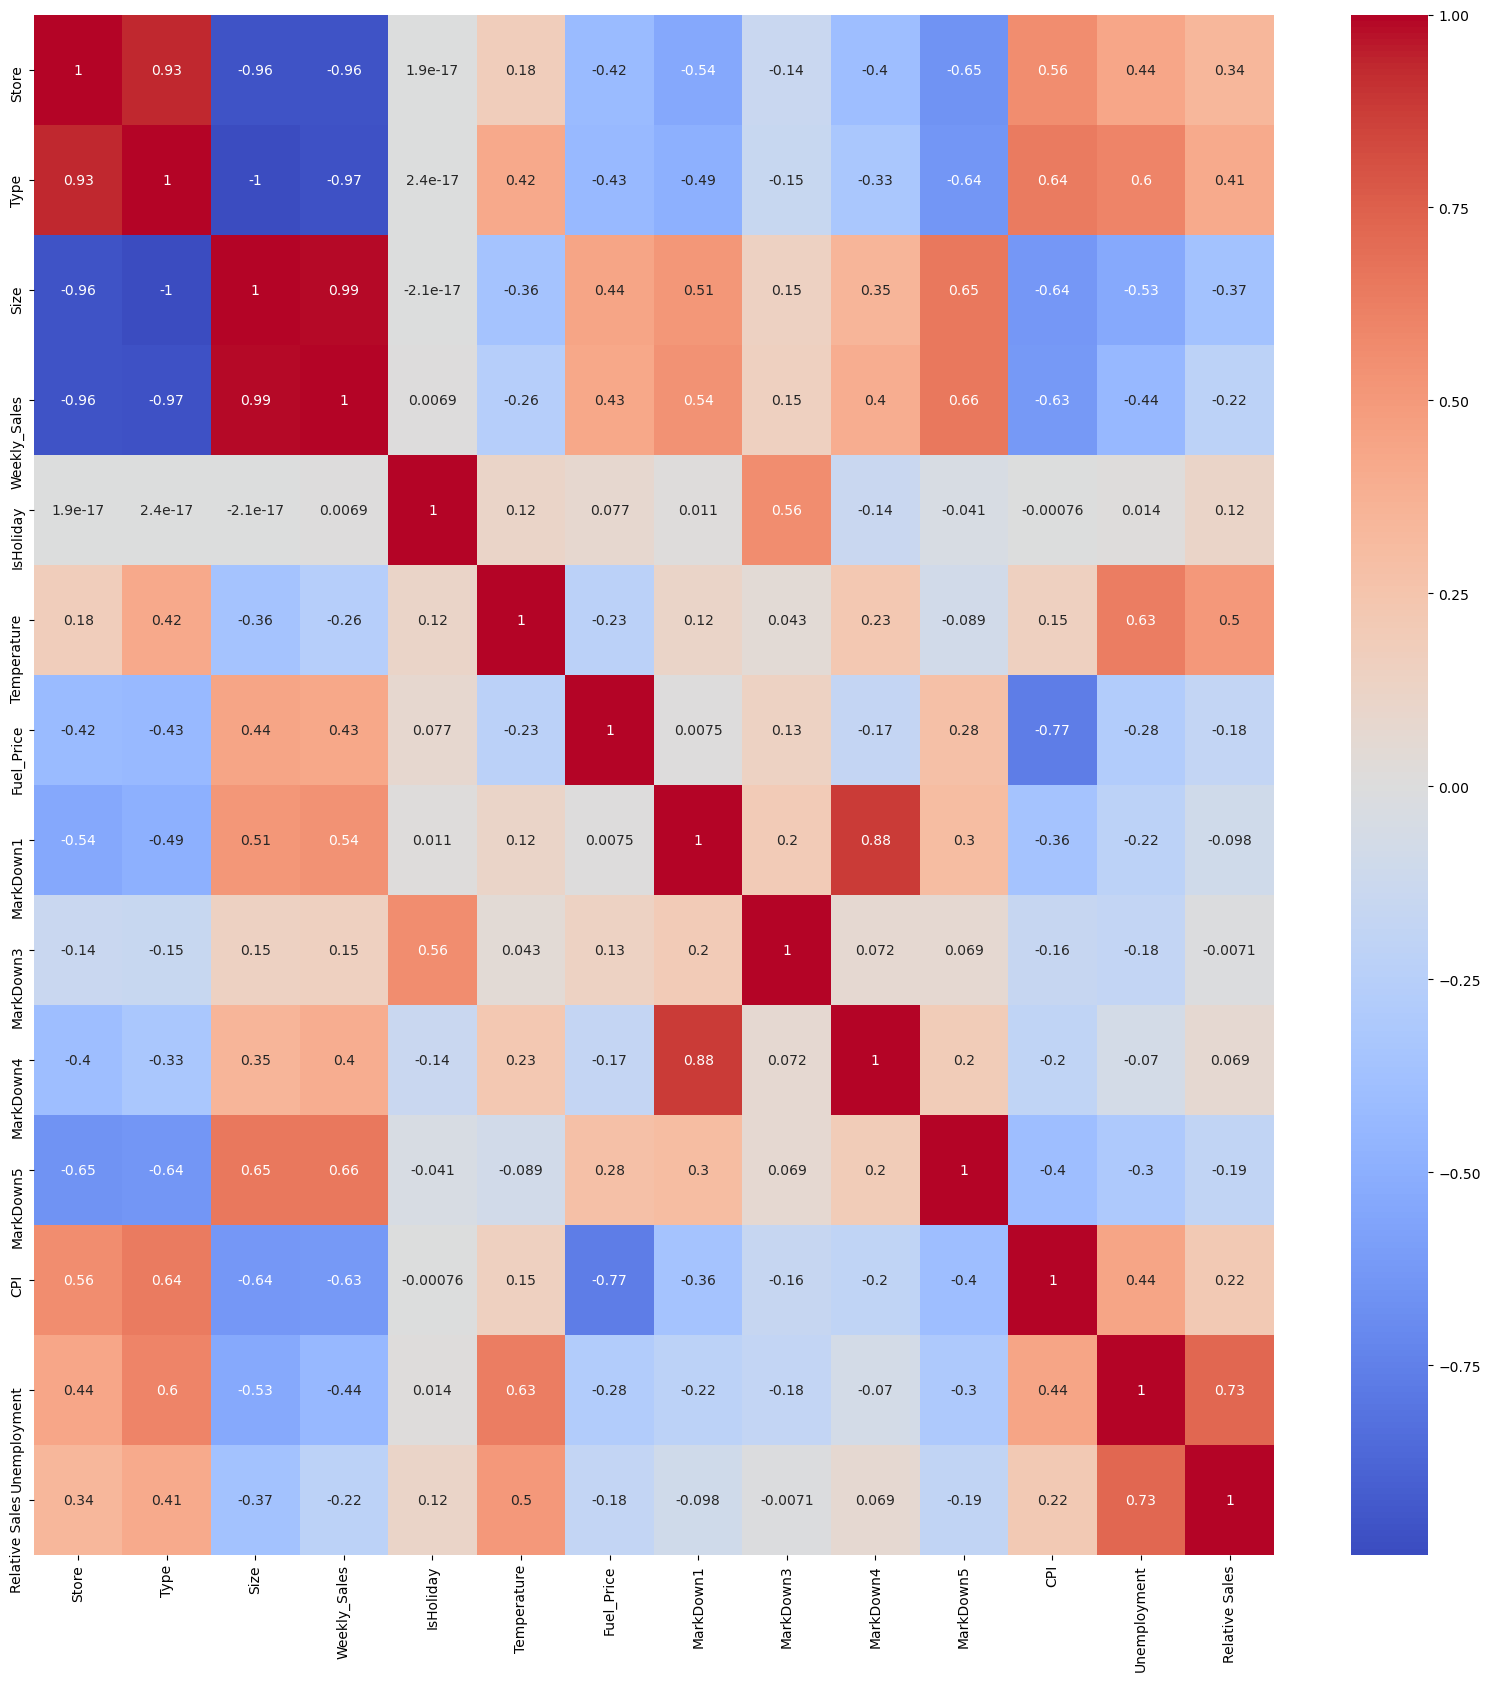

In [127]:
#correlation matrix for Top5

corr_matrix = top5_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') 
plt.show()

Siginificant negative correlation with weekly sales are umemployment, CPI, Temperature and (size)
Siginificant positive correlation with weekly sales are (size), and fuel price


In [128]:
stores5 = top5_df['Store'].unique()
stores5

array([10, 23, 37, 42, 43], dtype=int64)

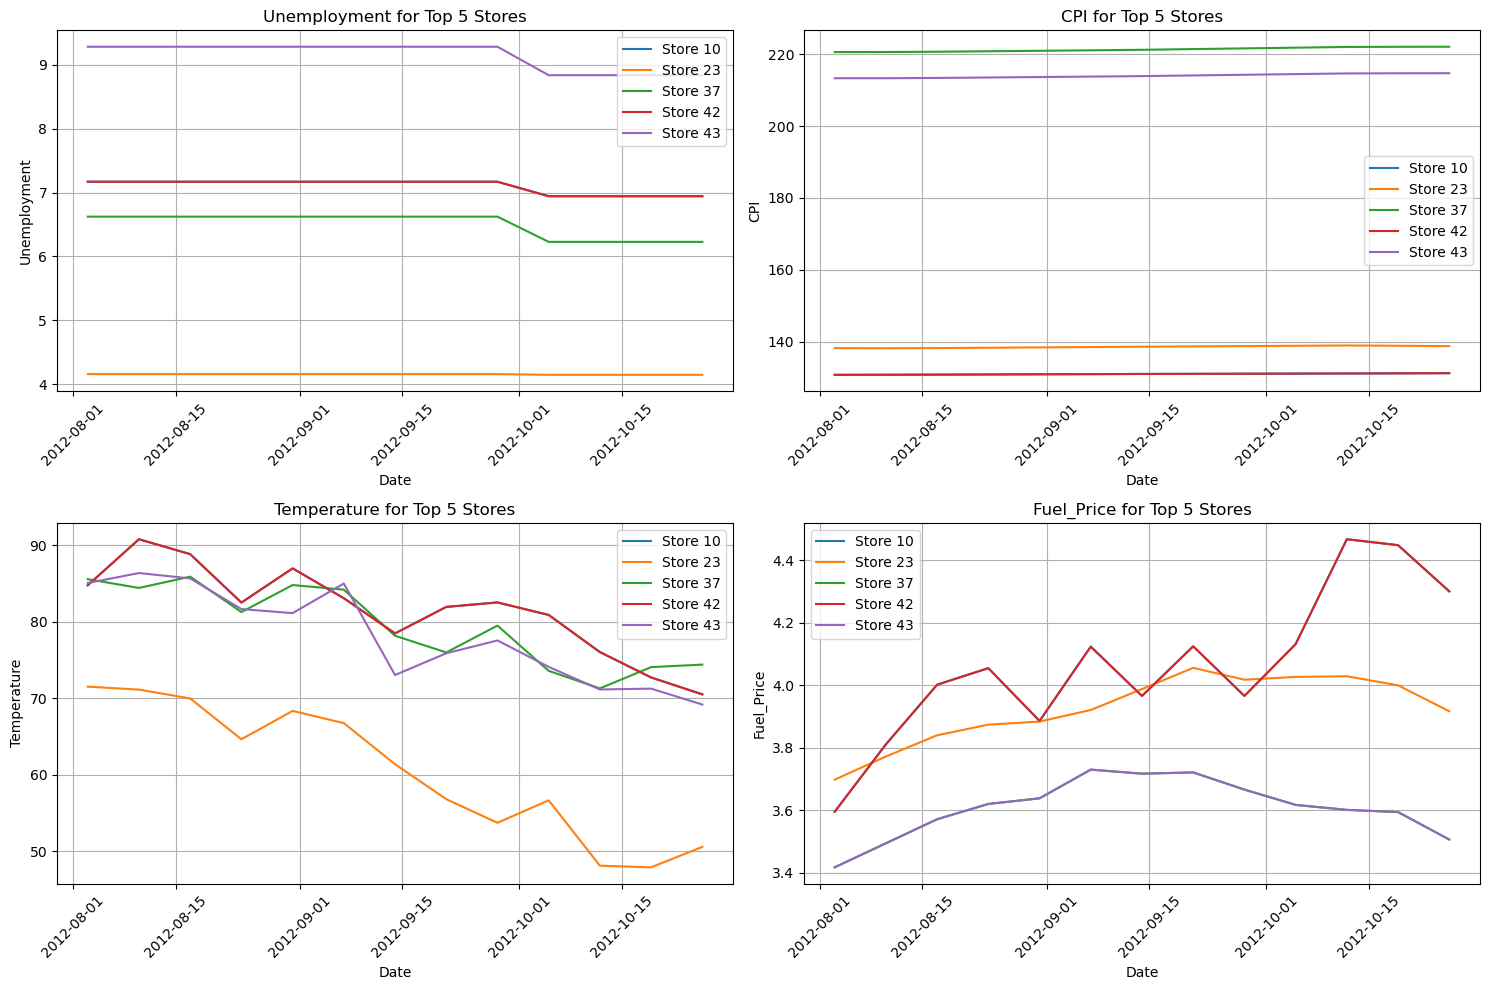

In [129]:
#linechart for top

features = ['Unemployment', 'CPI', 'Temperature', 'Fuel_Price']

# Define the stores you want to plot (assuming 'Store' is a column in your DataFrame)
stores = top5_df['Store'].unique()

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    plt.title(f'{feature} for Top 5 Stores')
    plt.xlabel('Date')
    plt.ylabel(feature)

    for store in stores:
        store_data = top5_df[top5_df['Store'] == store]
        plt.plot(store_data["Date"], store_data[feature], label=f'Store {store}')
        

    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Low 5 stores

In [130]:
low_5_stores = store_sales_sum.nsmallest(5, 'Relative Sales')
low_5_stores

,Store,Relative Sales
8,9,56.851860
14,15,59.954463
20,21,63.630150
24,25,70.785696
28,29,71.360752


In [131]:
low5 = [9, 15, 21, 25, 29]
low5_df = filtered_df[filtered_df["Store"].isin(low5)]
low5_df

,Store,Date,Type,Size,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Relative Sales
1274,9,2012-08-03,1.0,125833.0,533887.54,0.0,90.23,3.417,11864.50,0.220000,1659.09,2176.37,225.707044,5.277,4.242826
1275,9,2012-08-10,1.0,125833.0,538713.47,0.0,88.66,3.494,3180.78,1.400000,2112.03,2314.58,225.717009,5.277,4.281178
1276,9,2012-08-17,1.0,125833.0,535153.47,0.0,86.37,3.571,975.91,3.000000,325.68,670.48,225.799532,5.277,4.252887
1277,9,2012-08-24,1.0,125833.0,572887.78,0.0,77.90,3.620,1524.71,1.800000,501.16,4241.59,225.936473,5.277,4.552763
1278,9,2012-08-31,1.0,125833.0,576879.15,0.0,80.71,3.638,5758.14,17.600000,2828.89,1884.13,226.073413,5.277,4.584482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4142,29,2012-09-28,1.0,93638.0,489674.23,0.0,62.17,4.018,4039.87,1.980000,687.56,3822.63,138.739500,9.419,5.229439
4143,29,2012-10-05,1.0,93638.0,520632.80,0.0,62.09,4.027,4727.88,9.120000,676.30,1904.05,138.825600,9.151,5.560059
4144,29,2012-10-12,1.0,93638.0,513737.00,0.0,54.18,4.029,2264.29,6.800000,829.39,675.12,138.911700,9.151,5.486416
4145,29,2012-10-19,1.0,93638.0,516909.24,0.0,55.28,4.000,1021.83,2.280000,194.24,3821.21,138.833613,9.151,5.520293


In [132]:
low5_df = low5_df.sort_values(by = ["Store", "Date"], ascending=[True, True])
low5_df["Type"].unique()

array([1.])

C:\Users\johan\AppData\Local\Temp\ipykernel_3144\2069736683.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = low5_df.corr()


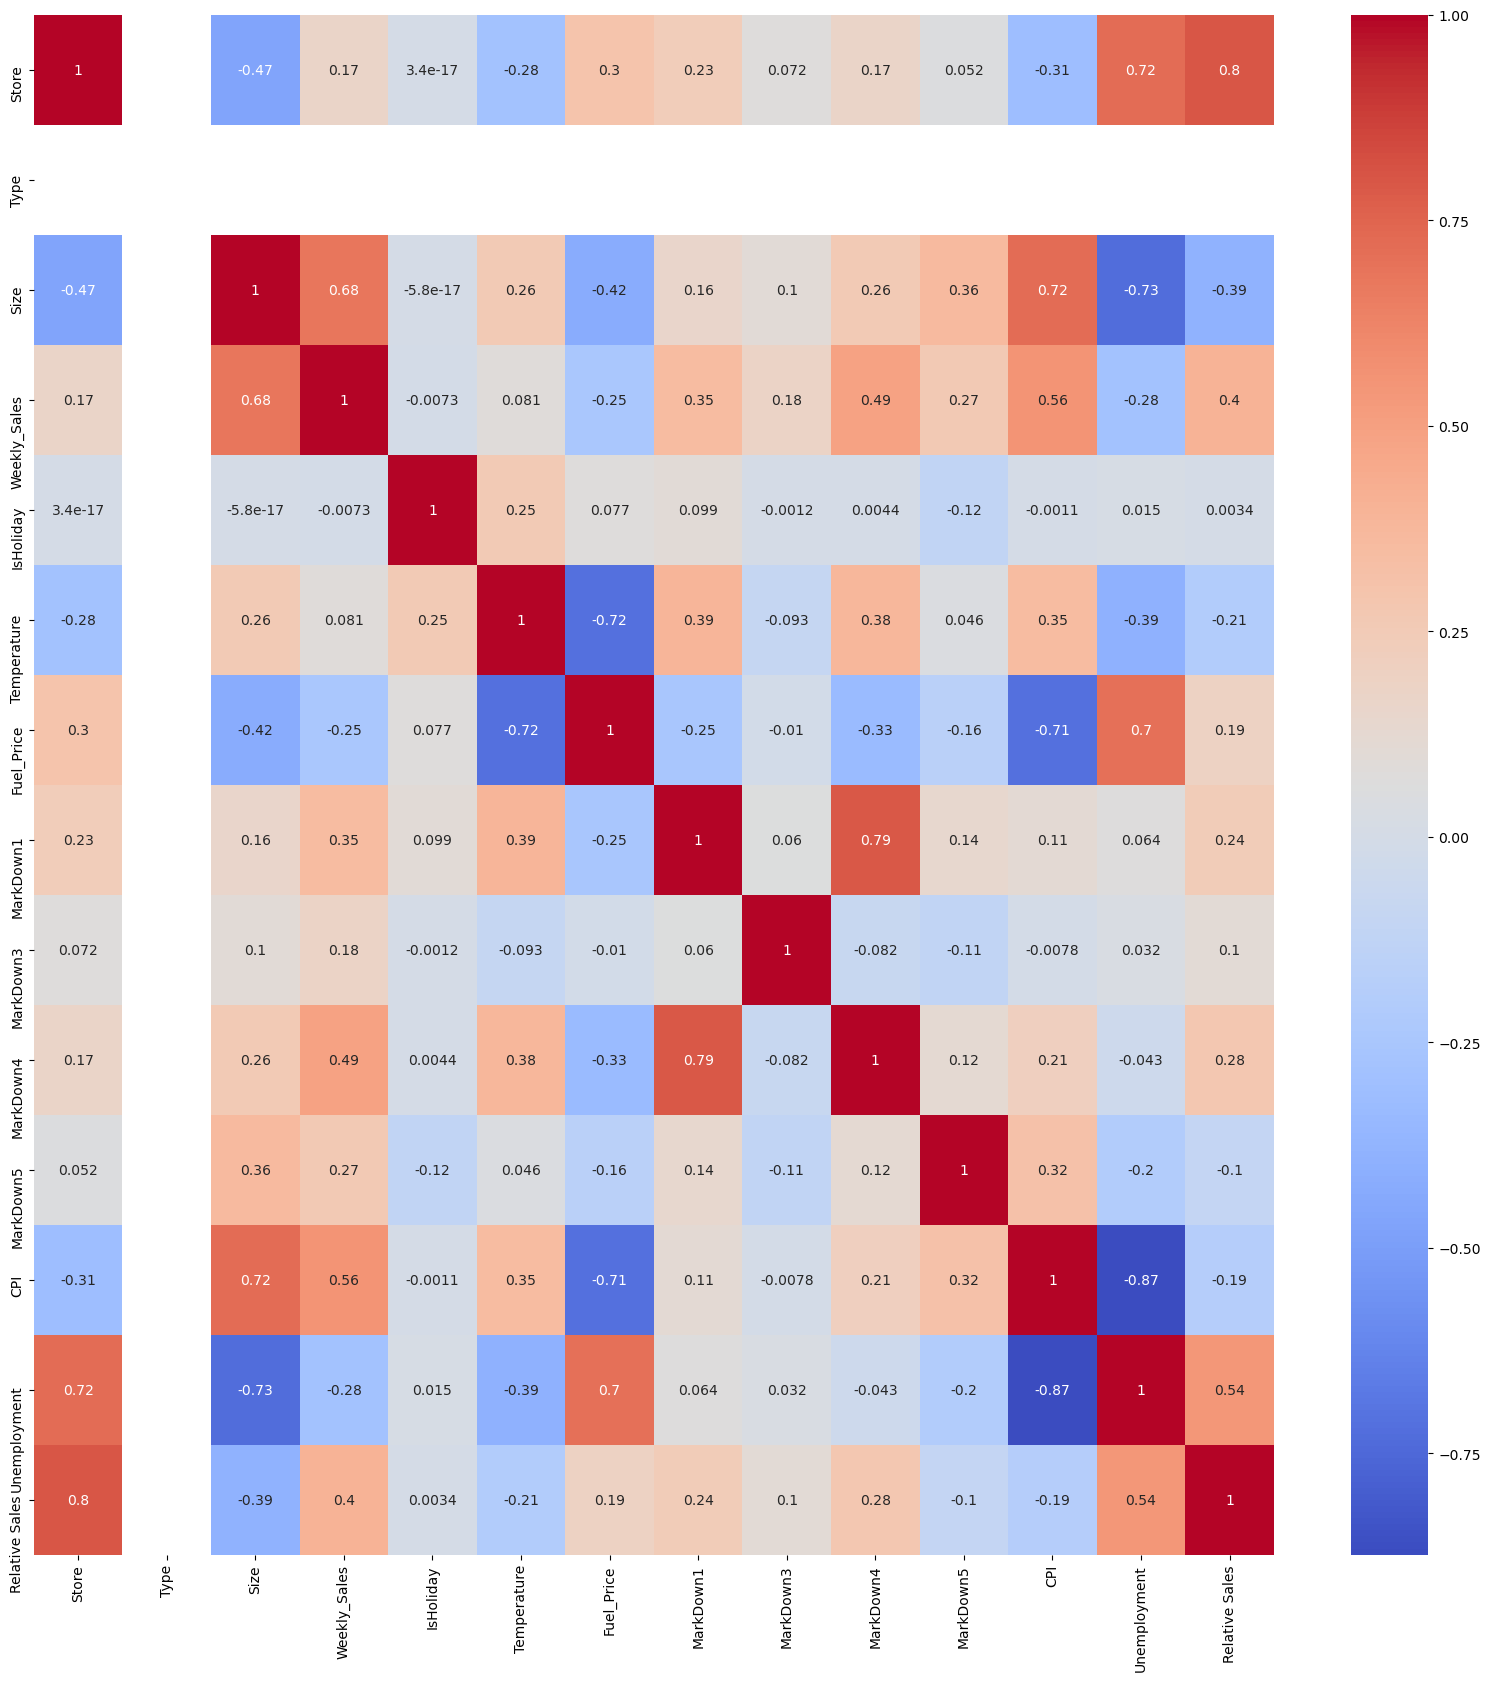

In [133]:
#correlation matrix for low5

corr_matrix = low5_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') 
plt.show()

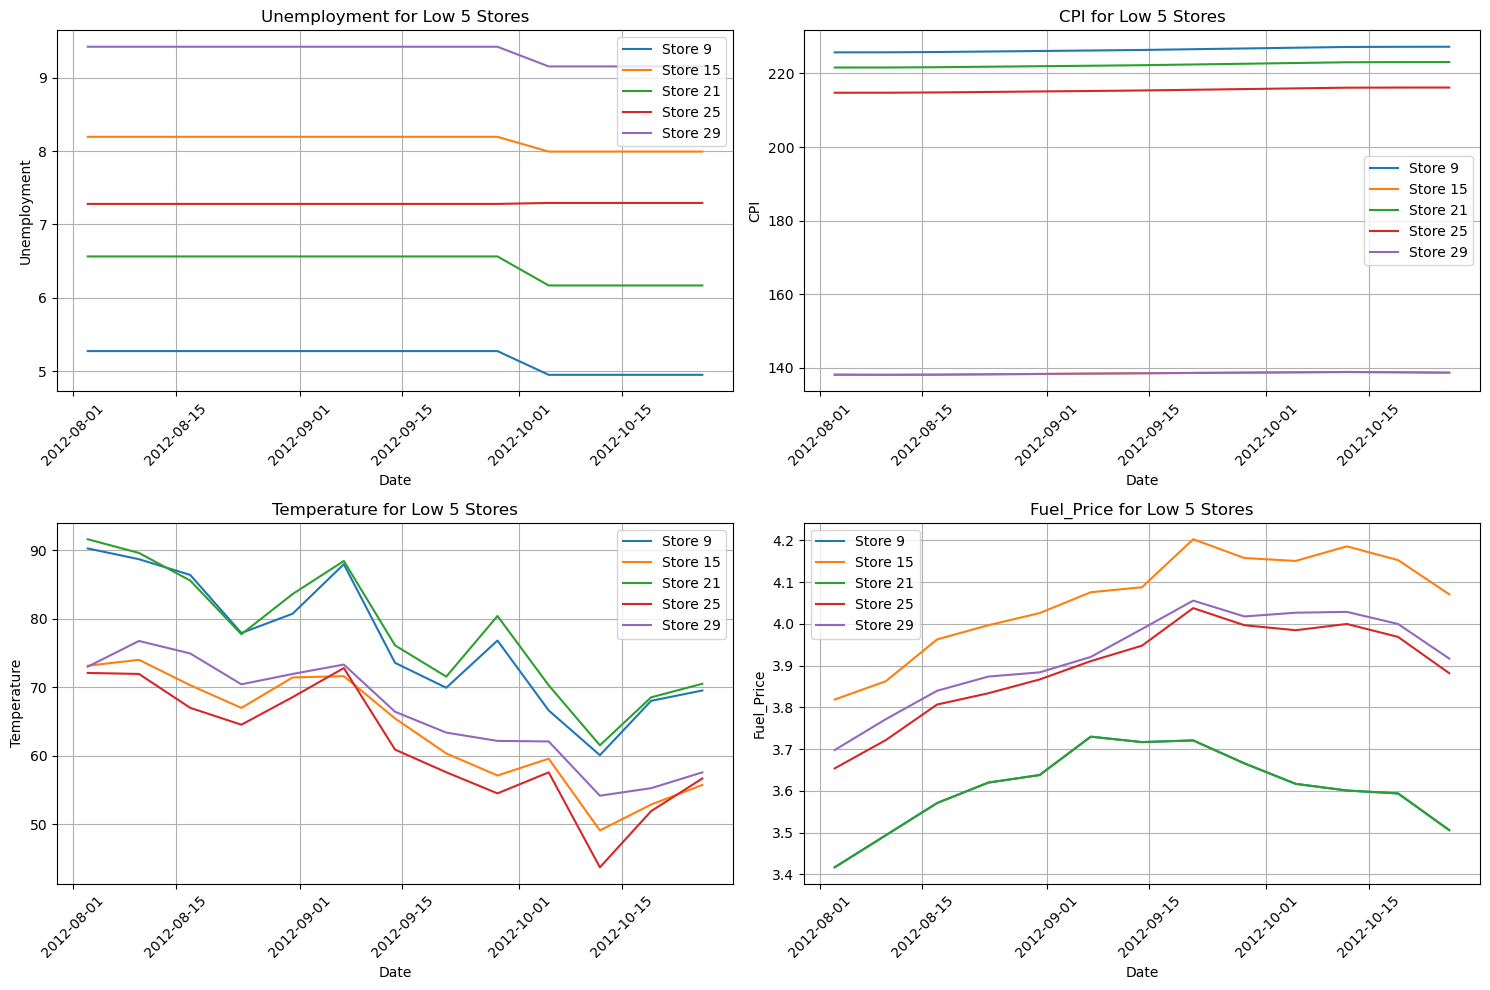

In [134]:
#linechart for low

features = ['Unemployment', 'CPI', 'Temperature', 'Fuel_Price']

# Define the stores you want to plot (assuming 'Store' is a column in your DataFrame)
stores = low5_df['Store'].unique()

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    plt.title(f'{feature} for Low 5 Stores')
    plt.xlabel('Date')
    plt.ylabel(feature)

    for store in stores:
        store_data = low5_df[low5_df['Store'] == store]
        plt.plot(store_data['Date'], store_data[feature], label=f'Store {store}')

    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Merge top5 and low 5 and plot line chart one color for top and another one for low5

In [135]:
dfr = [top5_df, low5_df]
df = pd.concat(dfr)
df

,Store,Date,Type,Size,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Relative Sales
1417,10,2012-08-03,1.0,126512.0,1939440.09,0.0,84.76,3.595,37194.44,53.400000,21623.93,2549.27,130.737871,7.170,15.330088
1418,10,2012-08-10,1.0,126512.0,1880436.94,0.0,90.78,3.811,15282.47,58.800000,5537.01,14827.71,130.756161,7.170,14.863704
1419,10,2012-08-17,1.0,126512.0,1827797.40,0.0,88.83,4.002,4407.90,7.200000,3037.56,3717.52,130.790968,7.170,14.447621
1420,10,2012-08-24,1.0,126512.0,1764984.15,0.0,82.50,4.055,11322.69,34.000000,6602.59,7256.22,130.838161,7.170,13.951120
1421,10,2012-08-31,1.0,126512.0,1650285.54,0.0,86.97,3.886,26218.85,68.240000,12440.51,3544.68,130.885355,7.170,13.044498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4142,29,2012-09-28,1.0,93638.0,489674.23,0.0,62.17,4.018,4039.87,1.980000,687.56,3822.63,138.739500,9.419,5.229439
4143,29,2012-10-05,1.0,93638.0,520632.80,0.0,62.09,4.027,4727.88,9.120000,676.30,1904.05,138.825600,9.151,5.560059
4144,29,2012-10-12,1.0,93638.0,513737.00,0.0,54.18,4.029,2264.29,6.800000,829.39,675.12,138.911700,9.151,5.486416
4145,29,2012-10-19,1.0,93638.0,516909.24,0.0,55.28,4.000,1021.83,2.280000,194.24,3821.21,138.833613,9.151,5.520293


In [143]:
df[df["Store"]== 43]

,Store,Date,Type,Size,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Relative Sales,Group
6136,43,2012-08-03,2.0,41062.0,614378.94,0.0,85.06,3.417,312.78,24.230000,22.860000,1317.60,213.338880,9.285,14.962226,
6137,43,2012-08-10,2.0,41062.0,643558.78,0.0,86.36,3.494,173.95,9.330000,4051.950714,1073.06,213.347364,9.285,15.672855,
6138,43,2012-08-17,2.0,41062.0,640210.85,0.0,85.66,3.571,254.74,11.900000,2170.936667,792.66,213.422696,9.285,15.591322,
6139,43,2012-08-24,2.0,41062.0,598234.64,0.0,81.65,3.620,364.02,13.070000,3593.668049,1309.22,213.548164,9.285,14.569058,
6140,43,2012-08-31,2.0,41062.0,593141.29,0.0,81.12,3.638,699.48,12.390000,615.930000,1122.02,213.673631,9.285,14.445017,
6141,43,2012-09-07,2.0,41062.0,663814.18,1.0,84.99,3.730,610.93,18.290000,50.500000,516.76,213.799099,9.285,16.166143,
6142,43,2012-09-14,2.0,41062.0,625196.94,0.0,73.03,3.717,1601.72,18.560000,1422.857436,1219.44,213.933217,9.285,15.225682,
6143,43,2012-09-21,2.0,41062.0,601990.02,0.0,75.87,3.721,259.57,58.085152,1448.269211,1792.73,214.119233,9.285,14.660514,
6144,43,2012-09-28,2.0,41062.0,577792.32,0.0,77.55,3.666,343.99,6.735758,1899.329737,1087.72,214.305250,9.285,14.071217,
6145,43,2012-10-05,2.0,41062.0,642614.89,0.0,74.09,3.617,183.84,0.010000,3124.299474,3093.39,214.491267,8.839,15.649868,


In [136]:
df.iloc[1]["Store"]

10

In [138]:
df.dropna(axis=1, inplace = True)

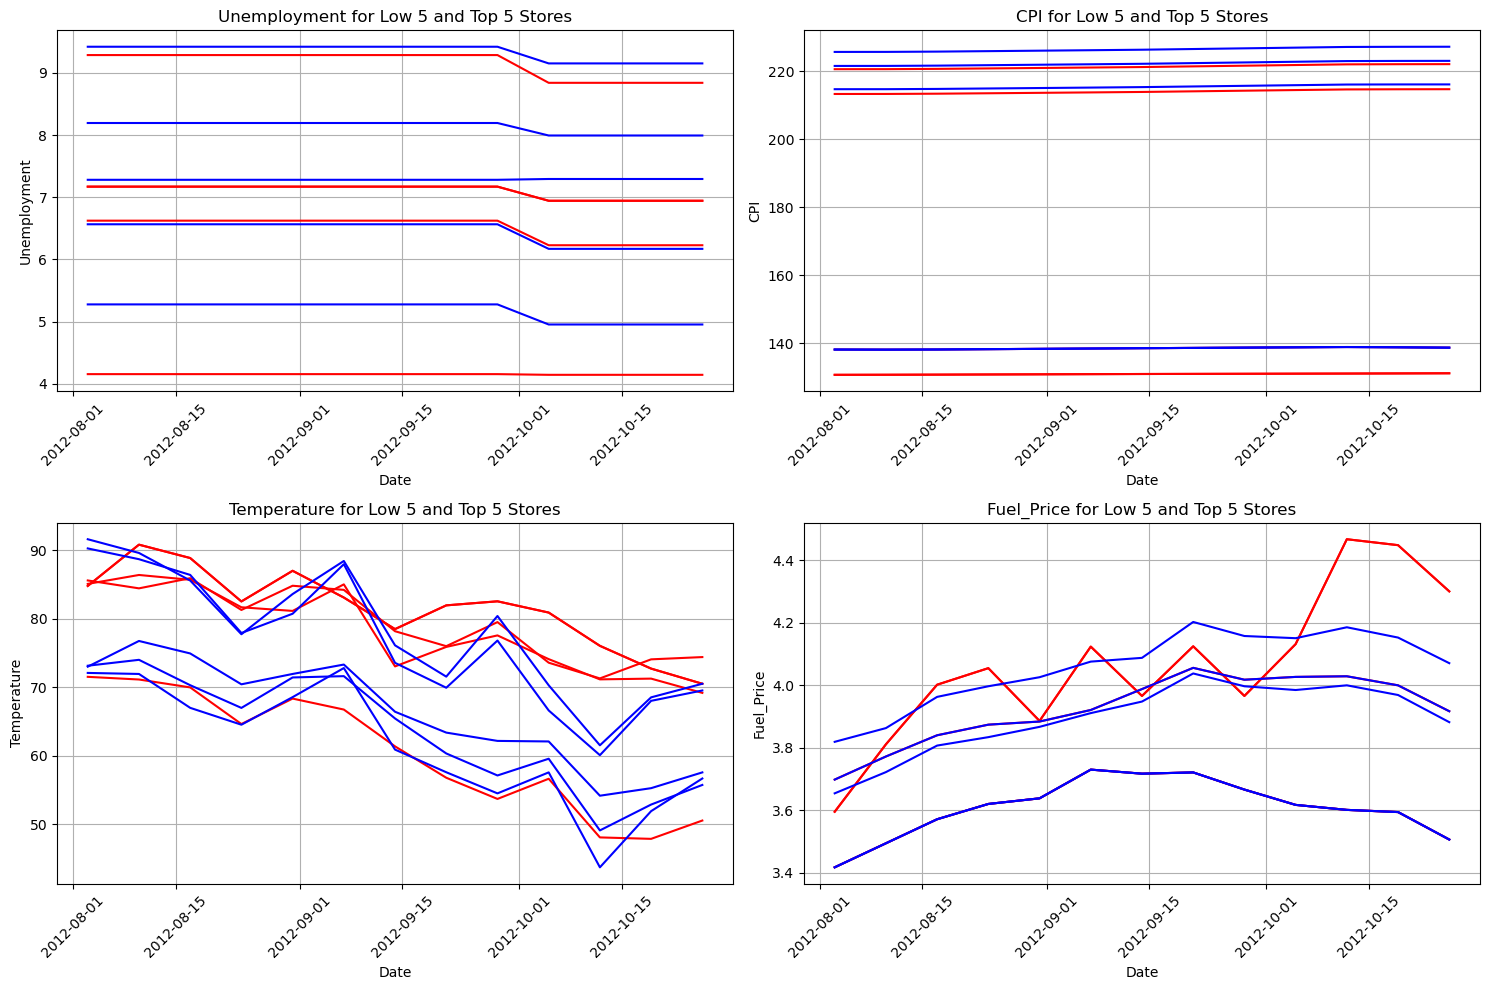

In [150]:
features = ['Unemployment', 'CPI', 'Temperature', 'Fuel_Price']

# Define the stores you want to plot (assuming 'Store' is a column in your DataFrame)
stores = df['Store'].unique()

plt.figure(figsize=(15, 10))

# Define colors for low5 and top5 stores
colors = {}
low5 = [9, 15, 21, 25, 29]
top5 = [43, 42, 10, 37, 23]

for store in stores:
    if store in low5:
        colors[store] = 'blue'
    elif store in top5:
        colors[store] = 'red'
    
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    plt.title(f'{feature} for Low 5 and Top 5 Stores')
    plt.xlabel('Date')
    plt.ylabel(feature)

    for store in stores:
        store_data = df[df['Store'] == store]
        plt.plot(store_data['Date'], store_data[feature], label=f'Store {store}', color=colors[store])

    plt.grid(True)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [145]:
df[df["Store"]== 43]

,Store,Date,Type,Size,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Relative Sales,Group
6136,43,2012-08-03,2.0,41062.0,614378.94,0.0,85.06,3.417,312.78,24.230000,22.860000,1317.60,213.338880,9.285,14.962226,
6137,43,2012-08-10,2.0,41062.0,643558.78,0.0,86.36,3.494,173.95,9.330000,4051.950714,1073.06,213.347364,9.285,15.672855,
6138,43,2012-08-17,2.0,41062.0,640210.85,0.0,85.66,3.571,254.74,11.900000,2170.936667,792.66,213.422696,9.285,15.591322,
6139,43,2012-08-24,2.0,41062.0,598234.64,0.0,81.65,3.620,364.02,13.070000,3593.668049,1309.22,213.548164,9.285,14.569058,
6140,43,2012-08-31,2.0,41062.0,593141.29,0.0,81.12,3.638,699.48,12.390000,615.930000,1122.02,213.673631,9.285,14.445017,
6141,43,2012-09-07,2.0,41062.0,663814.18,1.0,84.99,3.730,610.93,18.290000,50.500000,516.76,213.799099,9.285,16.166143,
6142,43,2012-09-14,2.0,41062.0,625196.94,0.0,73.03,3.717,1601.72,18.560000,1422.857436,1219.44,213.933217,9.285,15.225682,
6143,43,2012-09-21,2.0,41062.0,601990.02,0.0,75.87,3.721,259.57,58.085152,1448.269211,1792.73,214.119233,9.285,14.660514,
6144,43,2012-09-28,2.0,41062.0,577792.32,0.0,77.55,3.666,343.99,6.735758,1899.329737,1087.72,214.305250,9.285,14.071217,
6145,43,2012-10-05,2.0,41062.0,642614.89,0.0,74.09,3.617,183.84,0.010000,3124.299474,3093.39,214.491267,8.839,15.649868,
